In [1]:
import pandas as pd
import re
import numpy as np
import os
import csv
from pandas import DataFrame

In [2]:
df = pd.read_csv('./project/idol/song_data_yewon_ver03.csv', header = 0, encoding = 'utf-8', low_memory=False)

In [3]:
df.head()

,title,artist,album,release_date,song_genre,is_title,like,lyrics,lyricist,composer,arranger
0,태지 보이스,서태지와 아이들,시대유감(時代遺憾),1996.06.07,Rock,수록곡,269,갈수 없는 곳이란 우리에겐 없어<br>보이는 길밖에도 세상은 있어<br>언제나 식지...,서태지,서태지,서태지
1,시대유감(時代遺憾),서태지와 아이들,시대유감(時代遺憾),1996.06.07,Rock,타이틀 곡,"3,256",왜 기다려 왔잖아<br>모든 삶을 포기하는 소리를<br>이 세상이 모두 미쳐버릴<b...,서태지,서태지,서태지
2,수시아(誰是我),서태지와 아이들,시대유감(時代遺憾),1996.06.07,Rock,수록곡,488,이 세상 그 누구도 나를 닮을 순 없네<br>날 세상에 알릴 거야<br>나 역시 그...,서태지,서태지,서태지
3,Free Style,서태지와 아이들,시대유감(時代遺憾),1996.06.07,Rock,수록곡,599,항상 난 지나치기만 했네<br>이젠 난 미련없이 끝내<br>됐어 찾아냈어 난<br>...,"서태지 , 김종서","서태지 , 김종서",서태지
4,난 알아요,서태지와 아이들,Seotaji And Boys Good Bye Best Album,1996.02.10,Dance,타이틀 곡,620,난 알아요이밤이 흐르고 흐르면 누군가가<br>나를 떠나버려야 한다는 그사실을<br>...,서태지,서태지,서태지


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12704 entries, 0 to 12703
Data columns (total 11 columns):
title           12704 non-null object
artist          12704 non-null object
album           12704 non-null object
release_date    12704 non-null object
song_genre      12704 non-null object
is_title        12704 non-null object
like            12704 non-null object
lyrics          12704 non-null object
lyricist        9143 non-null object
composer        9143 non-null object
arranger        9143 non-null object
dtypes: object(11)
memory usage: 1.1+ MB


## SM / YG /JYP 최근 대표 여자아이돌 가사유형

### SM
- 레드벨벳

### JYP
- 트와이스 

### YG
- 블랙핑크 

In [6]:
SM_girls = df[df["artist"].str.contains('레드벨벳', na=False)]
SM_girls

,title,artist,album,release_date,song_genre,is_title,like,lyrics,lyricist,composer,arranger
10621,Power Up,레드벨벳,Summer Magic - Summer Mini Album,2018.08.06,Dance,타이틀 곡,"121,793",Ba-banana Ba-ba-banana-nana<br>Ba-banana Ba-ba...,kenzie,"Ellen Berg Tollbom , Cazzi Opeia ...","Jonatan Gusmark , Ludvig Evers a.k.a..."
10622,한 여름의 크리스마스 (With You),레드벨벳,Summer Magic - Summer Mini Album,2018.08.06,Dance,수록곡,"23,406",하얀 모래 위에 우리 둘<br>꼭 마치 눈이 덮인 풍경 같아<br>눈부신 태양 아래...,"1월 8일 , 송캐럿 (Jam Factory)","Nermin Harambasic , Anne Judith Wik ...","Nermin Harambasic , Hugo Solis , ..."
10623,Mr. E,레드벨벳,Summer Magic - Summer Mini Album,2018.08.06,Dance,수록곡,"16,121",너란 녀석이 있대지<br>다들 관심 있어 혼자인 걸 좋아한대<br>Lala-lala...,kenzie,"Trinity , kenzie , Courtney Wo...",Trinity
10624,Mosquito,레드벨벳,Summer Magic - Summer Mini Album,2018.08.06,Dance,수록곡,"15,248",불 꺼진 방엔 언제 또 들어왔니<br>마치 넌 Mosquito<br>진동소리<br>...,서지음,"Teddy Riley , 이현승 , DOM , ...",Teddy Riley
10625,Hit That Drum,레드벨벳,Summer Magic - Summer Mini Album,2018.08.06,Dance,수록곡,"16,658",두근두근 내 맘을 두드려놓고<br>자꾸만 도망가는 네 등 뒤로<br>가슴속에 난타라...,Misfit,"Ronny Svendsen , Nermin Harambasic ...","Ronny Svendsen , Nermin Harambasic ..."
10626,Blue Lemonade,레드벨벳,Summer Magic - Summer Mini Album,2018.08.06,Dance,수록곡,"19,853",Pop pop pop Ah ah ah ah<br>Pop pop pop Ah ah a...,서지음,"이주형 (MonoTree) , NOPARI (MonoTree) ...",NOPARI (MonoTree)
10627,떠날 거야,레드벨벳,투유 프로젝트 - 슈가맨2 Part.3,2018.01.29,Dance,수록곡,"7,455",널 만났던 시간들을 끝내기 위해<br>웃으며 안녕하며 보내야겠지<br>더 이상 네 ...,"최수정 , 이윤정",최수정,ButterFly
10628,Bad Boy,레드벨벳,The Perfect Red Velvet - The 2nd Album Repackage,2018.01.29,Dance,수록곡,"146,130",Who dat who dat who dat boy<br>수많은 사람 속 눈에 띈<b...,"JQ , 문희연","Stereotypes , Maxx Song , Whit...",Stereotypes
10629,All Right,레드벨벳,The Perfect Red Velvet - The 2nd Album Repackage,2018.01.29,Dance,수록곡,"19,161",별거 아닌데 종일 고민만 할 때엔<br>있잖아 Baby 그치 많잖아 Baby<br>...,이스란,"Kevin Charge , Phoebus Tassopoulos ...",Kevin Charge
10630,피카부 (Peek-A-Boo),레드벨벳,The Perfect Red Velvet - The 2nd Album Repackage,2018.01.29,Dance,타이틀 곡,"10,066",Uhm yeah yah<br>Oh gosh 난리야<br>Oh gosh 맞아 난 좀 ...,kenzie,"문샤인 , Cazzi Opeia , Ellen Berg...",문샤인


In [7]:
YG_girls = df[df["artist"].str.contains('블랙핑크', na=False)]
YG_girls

,title,artist,album,release_date,song_genre,is_title,like,lyrics,lyricist,composer,arranger
12039,뚜두뚜두 (DDU-DU DDU-DU),블랙핑크,SQUARE UP,2018.06.15,Rap / Hip-hop,수록곡,"186,672",착한 얼굴에 그렇지 못한 태도<br>가녀린 몸매 속<br>가려진 volume은 두 ...,TEDDY,"TEDDY , 24 , R.Tee , Bek...","TEDDY , 24 , R.Tee"
12040,Forever Young,블랙핑크,SQUARE UP,2018.06.15,Dance,타이틀 곡,"113,917",떠나지 마 just stay<br>지금 이 시간을 멈춘 채<br>너와 함께라면 난<...,TEDDY,"TEDDY , FUTURE BOUNCE","TEDDY , FUTURE BOUNCE , R.Tee"
12041,Really,블랙핑크,SQUARE UP,2018.06.15,R&B / Soul,수록곡,"31,133",If you really really love me<br>말해줘<br>나 없이 하루...,"TEDDY , Danny Chung","TEDDY , CHOICE37",CHOICE37
12042,See U Later,블랙핑크,SQUARE UP,2018.06.15,Dance,인기 곡,"26,676",아쉬울 것도 없어<br>진짜 할 만큼 했어<br>난 어차피 너 따위<br>있으나 없...,TEDDY,"TEDDY , R.Tee , 24","R.Tee , 24"
12043,마지막처럼,블랙핑크,마지막처럼,2017.06.22,Dance,수록곡,"170,437",너 뭔데 자꾸 생각나<br>자존심 상해 애가 타<br>얼굴이 뜨겁고 가슴은 계속 뛰...,"TEDDY , 브라더수 , CHOICE37","TEDDY , FUTURE BOUNCE , Lydia ...","FUTURE BOUNCE , TEDDY"
12044,불장난,블랙핑크,SQUARE TWO,2016.11.01,Dance,수록곡,"142,139",우리 엄만 매일 내게 말했어<br>언제나 남자 조심하라고<br>사랑은 마치 불장난 ...,TEDDY,"TEDDY , R.Tee",R.Tee
12045,STAY,블랙핑크,SQUARE TWO,2016.11.01,Folk,인기 곡,"62,526",툭하면 거친 말들로<br>내 맘에 상처를 내놓고<br>미안하단 말 한마디 없이<br...,TEDDY,"TEDDY , 서원진","TEDDY , 서원진"
12046,휘파람,블랙핑크,SQUARE ONE,2016.08.08,Rap / Hip-hop,타이틀 곡,"119,610",Hey boy<br>Make’ em whistle<br>like a missile ...,"TEDDY , Bekuh BOOM","TEDDY , FUTURE BOUNCE , Bekuh ...","TEDDY , FUTURE BOUNCE"
12047,붐바야,블랙핑크,SQUARE ONE,2016.08.08,Rap / Hip-hop,수록곡,"72,253",BLACKPINK in your area<br>BLACKPINK in your ar...,"TEDDY , Bekuh BOOM","TEDDY , Bekuh BOOM",TEDDY


In [8]:
JYP_girls = df[df["artist"].str.contains('트와이스', na = False)]
JYP_girls

,title,artist,album,release_date,song_genre,is_title,like,lyrics,lyricist,composer,arranger
11671,Dance The Night Away,트와이스,Summer Nights,2018.07.09,Dance,타이틀 곡,"120,361",라라라라라라라 라라라라라라라<br>You and me in the moonlight...,휘성 (Realslow),"Anne Judith Wik , Jonatan Gusmark ...","Jonatan Gusmark , Ludvig Evers a.k.a..."
11672,CHILLAX,트와이스,Summer Nights,2018.07.09,Dance,수록곡,"15,696",바빠 오늘은 피곤해<br>입에 붙어버린 그 말<br>딱 일주일만 쉬고 싶은데<br>...,별들의 전쟁,"이우민 `collapsedone` , Valeria Del Pre...",이우민 `collapsedone`
11673,Shot thru the heart,트와이스,Summer Nights,2018.07.09,Dance,수록곡,"10,287",You got me shot through the heart<br>자꾸만 눈이 가 ...,"모모 , 사나 , 미나","David Anthony Eames , Sophie White ...",David Anthony Eames
11674,SWEET TALKER,트와이스,Summer Nights,2018.07.09,Dance,수록곡,"4,706",Ah-ooh-ah Sweet Talker<br>Ah-ooh-ah<br>아주 달콤한 ...,"정연 , 채영","Erik Lidbom , MLC , Julie Yu",Erik Lidbom
11675,HO!,트와이스,Summer Nights,2018.07.09,Dance,수록곡,"4,856",매일 걸었던 그 길이<br>분명 이 길이 맞는데<br>오늘은 다른 것 같아<br>며...,지효,"Micky Blue , THE ELEV3N , Jore...",THE ELEV3N
11676,DEJAVU,트와이스,Summer Nights,2018.07.09,Dance,수록곡,"4,375",네가 나를 봐<br>Oh 뭔지 모를 떨림 끌림 가득해<br>첨이 아닌 것 같아<br...,Chloe,"Hayley Aitken , Jan Hallvard Larsen ...","Hayley Aitken , Jan Hallvard Larsen ..."
11677,SAY YES,트와이스,Summer Nights,2018.07.09,Ballad,타이틀 곡,"4,409",Would you be my love Say yeah<br>Say yes<br>왜 ...,이주형 (MonoTree),이주형 (MonoTree),이주형 (MonoTree)
11678,STUCK,트와이스,Summer Nights,2018.07.09,Dance,수록곡,"4,889",Love me baby<br>Love me baby<br>Love me baby<b...,별들의 전쟁,"FRANTS , Valeria Del Prete , S...","FRANTS , Avenue 52"
11679,What is Love?,트와이스,What is Love?,2018.04.09,Dance,수록곡,"119,685",매일같이 영화 속에서나<br>책 속에서나 드라마 속에서<br>사랑을 느껴<br>Um...,박진영,박진영,이우민 `collapsedone`
11680,SWEET TALKER,트와이스,What is Love?,2018.04.09,Dance,수록곡,"13,786",Ah ooh ah Sweet Talker<br>Ah ooh ah<br>아주 달콤한 ...,"정연 , 채영","Erik Lidbom , MLC , Julie Yu",Erik Lidbom


In [9]:
Group_list = [SM_girls, YG_girls, JYP_girls]
song_counts = []

for a in Group_list:
    song_counts.append(len(a))
print(song_counts)

[74, 9, 74]


In [10]:
Group_list_song_counts = {'레드벨벳' : 74,
                         '블랙핑크' : 9,
                         '트와이스' : 74}

In [19]:
Group_df = pd.DataFrame(list(Group_list_song_counts.items()), columns={'그룹', '곡수'});Group_df

,곡수,그룹
0,레드벨벳,74
1,블랙핑크,9
2,트와이스,74


In [18]:
import matplotlib.pyplot as plt

%matplotlib inline

[Text(0,0,'레드벨벳'), Text(0,0,'블랙핑크'), Text(0,0,'트와이스')]

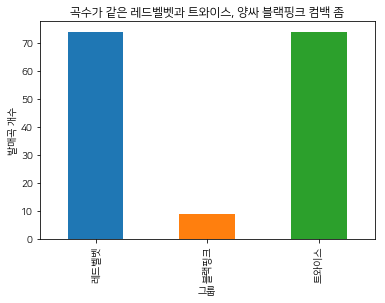

In [22]:
#간단하게 그룹별로 곡수를 그래프로 표현해봄
plot = Group_df['그룹'].plot(kind='bar', stacked=False, title= "곡수가 같은 레드벨벳과 트와이스, 양싸 블랙핑크 컴백 좀")
plot.set_xlabel("그룹")
plot.set_ylabel("발매곡 개수")
plot.set_xticklabels(Group_df['곡수'])

In [30]:
Group_df['데뷔일'] = ['2014/08/04', '2016/08/08', '2015/10/20'];Group_df

,곡수,그룹,데뷔일,days_since
0,레드벨벳,74,2014/08/04,1501
1,블랙핑크,9,2016/08/08,766
2,트와이스,74,2015/10/20,1059


In [31]:
# 데뷔일로부터 오늘까지 시간 구하기
from datetime import datetime

def compare_dates(date):
    date_format = '%Y/%m/%d'
    current_date = datetime.strptime(date, date_format)  
    today = datetime.today()
    diff = today - current_date
    return diff.days

Group_df['days_since'] = Group_df['데뷔일'].apply(compare_dates)

In [32]:
Group_df['days_since']

0    1501
1     766
2    1059
Name: days_since, dtype: int64

In [35]:
#데뷔 이후 시간을 곡수로 나눠봄
Group_df['평균 곡 발매주기'] = Group_df['days_since'].div(Group_df['그룹'], axis=0);Group_df

,곡수,그룹,데뷔일,days_since,평균 곡 발매주기
0,레드벨벳,74,2014/08/04,1501,20.283784
1,블랙핑크,9,2016/08/08,766,85.111111
2,트와이스,74,2015/10/20,1059,14.310811


[Text(0,0,'레드벨벳'), Text(0,0,'블랙핑크'), Text(0,0,'트와이스')]

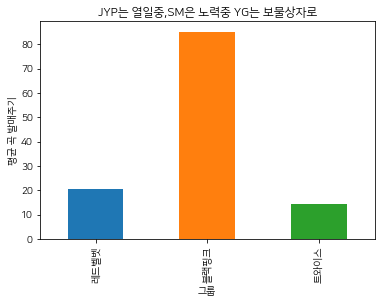

In [36]:
#평균 곡 발매주기그래프 생성
plot2 = Group_df['평균 곡 발매주기'].plot(kind='bar', stacked=False, title= "JYP는 열일중,SM은 노력중 YG는 보물상자로")
plot2.set_xlabel("그룹")
plot2.set_ylabel("평균 곡 발매주기")
plot2.set_xticklabels(Group_df['곡수'])

## 텍스트 마이닝

In [38]:
!pip install --upgrade pip

Requirement already up-to-date: pip in c:\anaconda3\lib\site-packages (18.0)


In [39]:
from konlpy.tag import Twitter
twi_tagger = Twitter()
from konlpy.utils import pprint

C:\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [40]:
!pip install JPype1-0.6.3-cp36-cp36m-win_amd64.whl

In [41]:
!pip install konlpy

## SM - 레드벨벳

In [42]:
#테스트
words_temp = twi_tagger.pos(SM_girls["lyrics"][10621], norm=True, stem=True)

In [43]:
pprint(words_temp)

[('Ba', 'Alpha'),
 ('-', 'Punctuation'),
 ('banana', 'Alpha'),
 ('Ba', 'Alpha'),
 ('-', 'Punctuation'),
 ('ba', 'Alpha'),
 ('-', 'Punctuation'),
 ('banana', 'Alpha'),
 ('-', 'Punctuation'),
 ('nana', 'Alpha'),
 ('<', 'Punctuation'),
 ('br', 'Alpha'),
 ('>', 'Punctuation'),
 ('Ba', 'Alpha'),
 ('-', 'Punctuation'),
 ('banana', 'Alpha'),
 ('Ba', 'Alpha'),
 ('-', 'Punctuation'),
 ('ba', 'Alpha'),
 ('-', 'Punctuation'),
 ('banana', 'Alpha'),
 ('-', 'Punctuation'),
 ('nana', 'Alpha'),
 ('<', 'Punctuation'),
 ('br', 'Alpha'),
 ('>', 'Punctuation'),
 ('Ba', 'Alpha'),
 ('-', 'Punctuation'),
 ('banana', 'Alpha'),
 ('Ba', 'Alpha'),
 ('-', 'Punctuation'),
 ('ba', 'Alpha'),
 ('-', 'Punctuation'),
 ('banana', 'Alpha'),
 ('-', 'Punctuation'),
 ('nana', 'Alpha'),
 ('<', 'Punctuation'),
 ('br', 'Alpha'),
 ('>', 'Punctuation'),
 ('Ba', 'Alpha'),
 ('-', 'Punctuation'),
 ('banana', 'Alpha'),
 ('Ba', 'Alpha'),
 ('-', 'Punctuation'),
 ('ba', 'Alpha'),
 ('-', 'Punctuation'),
 ('banana', 'Alpha'),
 ('-', 'Pun

In [44]:
from bs4 import BeautifulSoup
from nltk.corpus import stopwords

In [45]:
# (돈, Noun) -> "돈/Noun" 형태로 형태소 분석.
def tokenizer_twit(doc):
    return ['/'.join(t) for t in twi_tagger.pos(doc, norm=True, stem=True)]

In [46]:
# 리뷰 단어 리스트 형태로 만듦
def review_to_wordlist(review):
    try:
        review_text = BeautifulSoup(review.strip()).get_text()
    except AttributeError:
        review_text = ""
    review_words = tokenizer_twit(review_text)
    return review_words

In [47]:
#단어를 품사 단위로 
words=[]
for review in SM_girls["lyrics"]:
    words += review_to_wordlist(review)

C:\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [48]:
#단어 단위로 분해
pprint(words[:10])

['Ba/Alpha',
 '-/Punctuation',
 'banana/Alpha',
 'Ba/Alpha',
 '-/Punctuation',
 'ba/Alpha',
 '-/Punctuation',
 'banana/Alpha',
 '-/Punctuation',
 'nanaBa/Alpha']


In [49]:
import nltk

In [50]:
##문서 탐색을 위한 기능 호출
words_nltk = nltk.Text(words, name="Words in lyrics")

In [51]:
#전체 개수 세기
len(words_nltk.vocab())

2869

In [52]:
# 전체 텍스트 마이닝 결과 출력
SM_text = pprint(words_nltk.vocab().most_common(2869))

[('에/Josa', 347),
 ('하다/Verb', 302),
 ('을/Josa', 298),
 ('이/Josa', 260),
 ('너/Noun', 258),
 ('La/Alpha', 258),
 ('보다/Verb', 223),
 ('-/Punctuation', 209),
 ('내/Noun', 199),
 ('의/Josa', 188),
 ('가/Josa', 150),
 ('Dumb/Alpha', 142),
 ('I/Alpha', 128),
 ('네/Noun', 120),
 ('도/Josa', 117),
 ('나/Noun', 117),
 ('는/Josa', 117),
 ('있다/Adjective', 116),
 ('날/Noun', 114),
 ('같다/Adjective', 113),
 ('를/Josa', 113),
 ('말/Noun', 110),
 ("'/Punctuation", 110),
 ('그/Noun', 108),
 ('you/Alpha', 108),
 ('oh/Alpha', 108),
 ('없다/Adjective', 105),
 ('난/Noun', 103),
 ('또/Noun', 102),
 ('Oh/Alpha', 101),
 ('맘/Noun', 97),
 ('더/Noun', 97),
 ('처럼/Josa', 91),
 ('눈/Noun', 90),
 ('ah/Alpha', 90),
 ('me/Alpha', 90),
 ('것/Noun', 89),
 ('다/Adverb', 89),
 ('은/Josa', 86),
 ('사랑/Noun', 82),
 ('Peek/Alpha', 82),
 ('않다/Verb', 80),
 ('만/Josa', 78),
 ('’/Punctuation', 75),
 ('그렇다/Adjective', 75),
 ('A/Alpha', 75),
 ('넌/Noun', 72),
 ('들/Suffix', 71),
 ('싶다/Verb', 68),
 ('이/Noun', 68),
 ('t/Alpha', 66),
 ('수/Noun', 65),
 ('la/

 ('옷/Noun', 4),
 ('대신/Noun', 4),
 ('늦다/Verb', 4),
 ('Ha/Alpha', 4),
 ('벗어나다/Verb', 4),
 ('gosh/Alpha', 4),
 ('소리치다/Verb', 4),
 ('문제/Noun', 4),
 ('흥이/Noun', 4),
 ('여우/Noun', 4),
 ('놀다/Verb', 4),
 ('빙글빙글/Adverb', 4),
 ('똑같다/Adjective', 4),
 ('끼우다/Verb', 4),
 ('노/Noun', 4),
 ('ahooh/Alpha', 4),
 ('bright/Alpha', 4),
 ('탄성/Noun', 4),
 ('밝다/Verb', 4),
 ('부서지다/Verb', 4),
 ('데리다/Verb', 4),
 ('long/Alpha', 4),
 ('남겨지다/Verb', 4),
 ('Slow/Alpha', 4),
 ('준/Noun', 4),
 ('다가서다/Verb', 4),
 ('Never/Alpha', 4),
 ('멎다/Verb', 4),
 ('빠져들다/Verb', 4),
 ('meI/Alpha', 4),
 ('겨울/Noun', 4),
 ('물/Noun', 4),
 ('깜짝/Noun', 4),
 ('맘맘/Noun', 4),
 ('차근차근/Noun', 4),
 ('셋/Noun', 4),
 ('늘다/Verb', 4),
 ('attaboyAtta/Alpha', 4),
 ('atta/Alpha', 4),
 ('two/Alpha', 4),
 ('툭/Noun', 4),
 ('쿵/Noun', 4),
 ('내자/Noun', 4),
 ('goAh/Alpha', 4),
 ('달다/Verb', 4),
 ('외치다/Verb', 4),
 ('goWhat/Alpha', 4),
 ('생기다/Verb', 4),
 ('사체/Noun', 4),
 ('눈동자/Noun', 4),
 ('가두다/Verb', 4),
 ('평소/Noun', 4),
 ('기울이다/Verb', 4),
 ('편이/Noun', 4),
 ('떨어지다/V

 ('산타클로스/Noun', 1),
 ('계시다/Adjective', 1),
 ('면제/Noun', 1),
 ('ohOh/Alpha', 1),
 ('울/Noun', 1),
 ('녀석/Noun', 1),
 ('친해지다/Verb', 1),
 ('간/Noun', 1),
 ('ESo/Alpha', 1),
 ('powerful/Alpha', 1),
 ('MmmI/Alpha', 1),
 ('온종일/Noun', 1),
 ('기회/Noun', 1),
 ('별일/Noun', 1),
 ('free/Alpha', 1),
 ('계산/Noun', 1),
 ('물음표/Noun', 1),
 ('많아지다/Verb', 1),
 ('쓰이다/Verb', 1),
 ('OhBum/Alpha', 1),
 ('꺼지다/Verb', 1),
 ('무슨/Modifier', 1),
 ('야신/Noun', 1),
 ('경이/Noun', 1),
 ('곤/Noun', 1),
 ('어떡하다/Adjective', 1),
 ('중평/Noun', 1),
 ('화/Suffix', 1),
 ('로운/Josa', 1),
 ('단숨/Noun', 1),
 ('돌아다니다/Verb', 1),
 ('식/Noun', 1),
 ('농담/Noun', 1),
 ('일방/Noun', 1),
 ('계/Suffix', 1),
 ('음/Noun', 1),
 ('윙윙/Noun', 1),
 ('막다/Verb', 1),
 ('나타나다/Verb', 1),
 ('귀찮다/Adjective', 1),
 ('다시다/Verb', 1),
 ('속지/Noun', 1),
 ('이상은/Noun', 1),
 ('굴지/Noun', 1),
 ('도망가다/Verb', 1),
 ('등/Noun', 1),
 ('가슴속/Noun', 1),
 ('난타/Noun', 1),
 ('라도/Josa', 1),
 ('동동/Noun', 1),
 ('약/Noun', 1),
 ('용용/Noun', 1),
 ('아무래도/Adverb', 1),
 ('이대/Noun', 1),
 ('맺다/Verb', 1),


In [53]:
#결과 저장
SM_result = words_nltk.vocab().most_common(2869)

In [54]:
#데이터 프레임으로 생성
SM_result2 = pd.DataFrame(SM_result);SM_result[:100]

[('에/Josa', 347),
 ('하다/Verb', 302),
 ('을/Josa', 298),
 ('이/Josa', 260),
 ('너/Noun', 258),
 ('La/Alpha', 258),
 ('보다/Verb', 223),
 ('-/Punctuation', 209),
 ('내/Noun', 199),
 ('의/Josa', 188),
 ('가/Josa', 150),
 ('Dumb/Alpha', 142),
 ('I/Alpha', 128),
 ('네/Noun', 120),
 ('도/Josa', 117),
 ('나/Noun', 117),
 ('는/Josa', 117),
 ('있다/Adjective', 116),
 ('날/Noun', 114),
 ('같다/Adjective', 113),
 ('를/Josa', 113),
 ('말/Noun', 110),
 ("'/Punctuation", 110),
 ('그/Noun', 108),
 ('you/Alpha', 108),
 ('oh/Alpha', 108),
 ('없다/Adjective', 105),
 ('난/Noun', 103),
 ('또/Noun', 102),
 ('Oh/Alpha', 101),
 ('맘/Noun', 97),
 ('더/Noun', 97),
 ('처럼/Josa', 91),
 ('눈/Noun', 90),
 ('ah/Alpha', 90),
 ('me/Alpha', 90),
 ('것/Noun', 89),
 ('다/Adverb', 89),
 ('은/Josa', 86),
 ('사랑/Noun', 82),
 ('Peek/Alpha', 82),
 ('않다/Verb', 80),
 ('만/Josa', 78),
 ('’/Punctuation', 75),
 ('그렇다/Adjective', 75),
 ('A/Alpha', 75),
 ('넌/Noun', 72),
 ('들/Suffix', 71),
 ('싶다/Verb', 68),
 ('이/Noun', 68),
 ('t/Alpha', 66),
 ('수/Noun', 65),
 ('la/

## YG - 블랙핑크

In [55]:
#테스트
words_temp = twi_tagger.pos(YG_girls["lyrics"][12039], norm=True, stem=True)

In [56]:
pprint(words_temp)

[('착하다', 'Adjective'),
 ('얼굴', 'Noun'),
 ('에', 'Josa'),
 ('그렇다', 'Adjective'),
 ('못', 'Noun'),
 ('한', 'Josa'),
 ('태도', 'Noun'),
 ('<', 'Punctuation'),
 ('br', 'Alpha'),
 ('>', 'Punctuation'),
 ('가녀리다', 'Adjective'),
 ('몸매', 'Noun'),
 ('속', 'Noun'),
 ('<', 'Punctuation'),
 ('br', 'Alpha'),
 ('>', 'Punctuation'),
 ('가려진', 'Noun'),
 ('volume', 'Alpha'),
 ('은', 'Noun'),
 ('두', 'Noun'),
 ('배', 'Noun'),
 ('로', 'Josa'),
 ('<', 'Punctuation'),
 ('br', 'Alpha'),
 ('>', 'Punctuation'),
 ('거치다', 'Verb'),
 ('없이', 'Adverb'),
 ('직진', 'Noun'),
 ('<', 'Punctuation'),
 ('br', 'Alpha'),
 ('>', 'Punctuation'),
 ('굳이', 'Noun'),
 ('보다', 'Verb'),
 ('않다', 'Verb'),
 ('눈치', 'Noun'),
 ('<', 'Punctuation'),
 ('br', 'Alpha'),
 ('>', 'Punctuation'),
 ('Black', 'Alpha'),
 ('하다', 'Verb'),
 ('Pink', 'Alpha'),
 ('<', 'Punctuation'),
 ('br', 'Alpha'),
 ('>', 'Punctuation'),
 ('우린', 'Noun'),
 ('예쁘장하다', 'Adjective'),
 ('Savage', 'Alpha'),
 ('<', 'Punctuation'),
 ('br', 'Alpha'),
 ('>', 'Punctuation'),
 ('원하다', 'Adjective

In [57]:
#단어를 품사 단위로 
words=[]
for review in YG_girls["lyrics"]:
    words += review_to_wordlist(review)

C:\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [58]:
#단어 단위로 분해
pprint(words[:10])

['착하다/Adjective',
 '얼굴/Noun',
 '에/Josa',
 '그렇다/Adjective',
 '못/Noun',
 '한/Josa',
 '태도/Noun',
 '가녀리다/Adjective',
 '몸매/Noun',
 '속/Modifier']


In [59]:
##문서 탐색을 위한 기능 호출
words_nltk = nltk.Text(words, name="Words in lyrics")

In [60]:
#전체 개수 세기
len(words_nltk.vocab())

959

In [61]:
# 전체 텍스트 마이닝 결과 출력
YG_text = pprint(words_nltk.vocab().most_common(959))

[('YAH/Alpha', 64),
 ('하다/Verb', 44),
 ('you/Alpha', 39),
 ('u/Alpha', 39),
 ('처럼/Josa', 37),
 ('은/Josa', 35),
 ('내/Noun', 34),
 ('이/Josa', 34),
 ('I/Alpha', 33),
 ('너/Noun', 32),
 ('’/Punctuation', 31),
 ('really/Alpha', 31),
 ('날/Noun', 29),
 ('없다/Adjective', 28),
 ('later/Alpha', 27),
 ('me/Alpha', 26),
 ('bum/Alpha', 25),
 ('-/Punctuation', 24),
 ('을/Josa', 23),
 ('에/Josa', 22),
 ('boy/Alpha', 22),
 ('가/Josa', 21),
 ('that/Alpha', 19),
 ('마지막/Noun', 19),
 ('a/Alpha', 19),
 ('마/Noun', 18),
 ('말/Noun', 18),
 ("'/Punctuation", 18),
 ('see/Alpha', 18),
 ('지금/Noun', 17),
 ('것/Noun', 16),
 ('도/Josa', 16),
 ('네/Noun', 16),
 ('뜨겁다/Adjective', 15),
 ('밤/Noun', 15),
 ('laterSee/Alpha', 15),
 ('with/Alpha', 14),
 ('널/Noun', 14),
 ('like/Alpha', 14),
 ('게/Noun', 14),
 ('up/Alpha', 14),
 ('보다/Verb', 13),
 ('넌/Noun', 13),
 ('s/Alpha', 13),
 ('수/Noun', 13),
 ('는/Josa', 13),
 ('t/Alpha', 13),
 ('love/Alpha', 13),
 ('사랑/Noun', 13),
 ('원하다/Adjective', 12),
 ('난/Noun', 12),
 ('du/Alpha', 12),
 ('go/A

In [62]:
#결과 저장
YG_result = words_nltk.vocab().most_common(959)

In [63]:
#데이터 프레임으로 생성
YG_result2 = pd.DataFrame(YG_result);YG_result[:50]

[('YAH/Alpha', 64),
 ('하다/Verb', 44),
 ('you/Alpha', 39),
 ('u/Alpha', 39),
 ('처럼/Josa', 37),
 ('은/Josa', 35),
 ('내/Noun', 34),
 ('이/Josa', 34),
 ('I/Alpha', 33),
 ('너/Noun', 32),
 ('’/Punctuation', 31),
 ('really/Alpha', 31),
 ('날/Noun', 29),
 ('없다/Adjective', 28),
 ('later/Alpha', 27),
 ('me/Alpha', 26),
 ('bum/Alpha', 25),
 ('-/Punctuation', 24),
 ('을/Josa', 23),
 ('에/Josa', 22),
 ('boy/Alpha', 22),
 ('가/Josa', 21),
 ('that/Alpha', 19),
 ('마지막/Noun', 19),
 ('a/Alpha', 19),
 ('마/Noun', 18),
 ('말/Noun', 18),
 ("'/Punctuation", 18),
 ('see/Alpha', 18),
 ('지금/Noun', 17),
 ('것/Noun', 16),
 ('도/Josa', 16),
 ('네/Noun', 16),
 ('뜨겁다/Adjective', 15),
 ('밤/Noun', 15),
 ('laterSee/Alpha', 15),
 ('with/Alpha', 14),
 ('널/Noun', 14),
 ('like/Alpha', 14),
 ('게/Noun', 14),
 ('up/Alpha', 14),
 ('보다/Verb', 13),
 ('넌/Noun', 13),
 ('s/Alpha', 13),
 ('수/Noun', 13),
 ('는/Josa', 13),
 ('t/Alpha', 13),
 ('love/Alpha', 13),
 ('사랑/Noun', 13),
 ('원하다/Adjective', 12)]

## JYP - 트와이스

In [64]:
#테스트
words_temp = twi_tagger.pos(JYP_girls["lyrics"][11679], norm=True, stem=True)

In [65]:
pprint(words_temp)

[('매일', 'Noun'),
 ('같이', 'Josa'),
 ('영화', 'Noun'),
 ('속', 'Noun'),
 ('에서나', 'Josa'),
 ('<', 'Punctuation'),
 ('br', 'Alpha'),
 ('>', 'Punctuation'),
 ('책', 'Noun'),
 ('속', 'Noun'),
 ('에서나', 'Josa'),
 ('드라마', 'Noun'),
 ('속', 'Noun'),
 ('에서', 'Josa'),
 ('<', 'Punctuation'),
 ('br', 'Alpha'),
 ('>', 'Punctuation'),
 ('사랑', 'Noun'),
 ('을', 'Josa'),
 ('느끼다', 'Verb'),
 ('<', 'Punctuation'),
 ('br', 'Alpha'),
 ('>', 'Punctuation'),
 ('Um', 'Alpha'),
 ('사랑', 'Noun'),
 ('을', 'Josa'),
 ('배우다', 'Verb'),
 ('<', 'Punctuation'),
 ('br', 'Alpha'),
 ('>', 'Punctuation'),
 ('내', 'Noun'),
 ('일', 'Noun'),
 ('처럼', 'Josa'),
 ('자꾸', 'Noun'),
 ('가슴', 'Noun'),
 ('이', 'Josa'),
 ('뛰다', 'Verb'),
 ('<', 'Punctuation'),
 ('br', 'Alpha'),
 ('>', 'Punctuation'),
 ('두근', 'Adverb'),
 ('두근거리다', 'Adjective'),
 ('설레임', 'Noun'),
 ('에', 'Josa'),
 ('부풀다', 'Verb'),
 ('오르다', 'Verb'),
 ('<', 'Punctuation'),
 ('br', 'Alpha'),
 ('>', 'Punctuation'),
 ('Um', 'Alpha'),
 ('궁금하다', 'Adjective'),
 ('미치다', 'Adjective'),
 ('것', 'Noun'),

In [66]:
#단어를 품사 단위로 
words=[]
for review in JYP_girls["lyrics"]:
    words += review_to_wordlist(review)

C:\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [67]:
#단어 단위로 분해
pprint(words[:10])

['라라라/Noun',
 '라라라/Noun',
 'You/Alpha',
 'and/Alpha',
 'me/Alpha',
 'in/Alpha',
 'the/Alpha',
 'moonlight/Alpha',
 '별/Noun',
 '꽃/Noun']


In [68]:
##문서 탐색을 위한 기능 호출
words_nltk = nltk.Text(words, name="Words in lyrics")

In [69]:
#전체 개수 세기
len(words_nltk.vocab())

2285

In [70]:
# 전체 텍스트 마이닝 결과 출력
JYP_text = pprint(words_nltk.vocab().most_common(2285))

[('하다/Verb', 424),
 ('너/Noun', 371),
 ('내/Noun', 350),
 ('이/Josa', 317),
 ('보다/Verb', 303),
 ('을/Josa', 285),
 ('가/Josa', 265),
 ('oh/Alpha', 235),
 ('에/Josa', 213),
 ('맘/Noun', 212),
 ('날/Noun', 193),
 ('you/Alpha', 183),
 ('만/Josa', 173),
 ("'/Punctuation", 154),
 ('말/Noun', 150),
 ('나/Noun', 147),
 ('I/Alpha', 138),
 ('더/Noun', 137),
 ('있다/Adjective', 134),
 ('네/Noun', 128),
 ('도/Josa', 126),
 ('없다/Adjective', 126),
 ('me/Alpha', 123),
 ('를/Josa', 122),
 ('모르다/Verb', 122),
 ('은/Josa', 121),
 ('-/Punctuation', 120),
 ('어떻다/Adjective', 119),
 ('싶다/Verb', 116),
 ('같다/Adjective', 116),
 ('널/Noun', 113),
 ('다/Adverb', 112),
 ('좋다/Adjective', 108),
 ('나르다/Verb', 106),
 ('것/Noun', 104),
 ('Baby/Alpha', 103),
 ('눈/Noun', 102),
 ('난/Noun', 100),
 ('않다/Verb', 99),
 ('jelly/Alpha', 97),
 ('on/Alpha', 94),
 ('의/Josa', 93),
 ('왜/Noun', 89),
 ('바라보다/Verb', 89),
 ('know/Alpha', 85),
 ('Oh/Alpha', 83),
 ('my/Alpha', 83),
 ('해/Noun', 82),
 ('는/Josa', 81),
 ('wanna/Alpha', 80),
 ('좀/Noun', 80),
 ('lo

 ('반전/Noun', 2),
 ('순정만화/Noun', 2),
 ('튕겨/Noun', 2),
 ('나종일/Noun', 2),
 ('방울방울/Noun', 2),
 ('지우다/Verb', 2),
 ('Lucky/Alpha', 2),
 ('한눈/Noun', 2),
 ('찌리/Noun', 2),
 ('릿/Noun', 2),
 ('DF/Alpha', 2),
 ('어지르다/Verb', 2),
 ('소녀/Noun', 2),
 ('runnin/Alpha', 2),
 ('서미래/Noun', 2),
 ('운동화/Noun', 2),
 ('하이힐/Noun', 2),
 ('단발/Noun', 2),
 ('머린/Noun', 2),
 ('찰랑/Noun', 2),
 ('생머리/Noun', 2),
 ('결심/Noun', 2),
 ('Fairy/Alpha', 2),
 ('Twice/Alpha', 2),
 ('달이/Noun', 2),
 ('풋풋하다/Adjective', 2),
 ('뺨/Noun', 2),
 ('색조/Noun', 2),
 ('화장/Noun', 2),
 ('헐렁하다/Adjective', 2),
 ('교복/Noun', 2),
 ('원피스/Noun', 2),
 ('폭/Noun', 2),
 ('어질어질하다/Adjective', 2),
 ('future/Alpha', 2),
 ('아마/Noun', 2),
 ('We/Alpha', 2),
 ('도어/Noun', 2),
 ('떡/Noun', 2),
 ('키스/Noun', 2),
 ('조용하다/Adjective', 2),
 ('어리둥절하다/Adjective', 2),
 ('데자뷔/Noun', 2),
 ('꼬집다/Verb', 2),
 ('엿보다/Verb', 2),
 ('floor/Alpha', 2),
 ('자리/Suffix', 2),
 ('예상/Noun', 2),
 ('남자친구/Noun', 2),
 ('조/Modifier', 2),
 ('금은/Noun', 2),
 ('웃기/Noun', 2),
 ('지만/Josa', 2),
 ('미녀/Noun', 

In [71]:
#결과 저장
JYP_result = words_nltk.vocab().most_common(959)

In [72]:
#데이터 프레임으로 생성
JYP_result2 = pd.DataFrame(JYP_result);JYP_result[:50]

[('하다/Verb', 424),
 ('너/Noun', 371),
 ('내/Noun', 350),
 ('이/Josa', 317),
 ('보다/Verb', 303),
 ('을/Josa', 285),
 ('가/Josa', 265),
 ('oh/Alpha', 235),
 ('에/Josa', 213),
 ('맘/Noun', 212),
 ('날/Noun', 193),
 ('you/Alpha', 183),
 ('만/Josa', 173),
 ("'/Punctuation", 154),
 ('말/Noun', 150),
 ('나/Noun', 147),
 ('I/Alpha', 138),
 ('더/Noun', 137),
 ('있다/Adjective', 134),
 ('네/Noun', 128),
 ('도/Josa', 126),
 ('없다/Adjective', 126),
 ('me/Alpha', 123),
 ('를/Josa', 122),
 ('모르다/Verb', 122),
 ('은/Josa', 121),
 ('-/Punctuation', 120),
 ('어떻다/Adjective', 119),
 ('싶다/Verb', 116),
 ('같다/Adjective', 116),
 ('널/Noun', 113),
 ('다/Adverb', 112),
 ('좋다/Adjective', 108),
 ('나르다/Verb', 106),
 ('것/Noun', 104),
 ('Baby/Alpha', 103),
 ('눈/Noun', 102),
 ('난/Noun', 100),
 ('않다/Verb', 99),
 ('jelly/Alpha', 97),
 ('on/Alpha', 94),
 ('의/Josa', 93),
 ('왜/Noun', 89),
 ('바라보다/Verb', 89),
 ('know/Alpha', 85),
 ('Oh/Alpha', 83),
 ('my/Alpha', 83),
 ('해/Noun', 82),
 ('는/Josa', 81),
 ('wanna/Alpha', 80)]

### 결과에 나,너,그 이런 것들이 많아서 소속사별 가사특징이나 내용은 명사만 따로 추출해서 봐야될 것 같다.